# Data Preprocessing Pipelines Comparison

In [1]:
import os
os.environ["WANDB_DISABLED"] = "true"

## Load Packages

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import re
import string
import seaborn as sns
import xgboost as xgb
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report,
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
)
from sklearn.naive_bayes import MultinomialNB
from scipy.sparse import hstack

## Load Data

In [3]:
df = pd.read_csv(
    "https://raw.githubusercontent.com/ericiortega/ids705-phishing-detection/main/data/cleaning/2_cleaned_data.csv"
)

df

,sender,receiver,clean_text,urls,label
0,Tomas Jacobs <RickyAmes@aol.com>,the00@speedy.uwaterloo.ca,"Generic Cialis, branded quality@ \n\n\n\n\n\n...",0,1
1,Yan Morin <yan.morin@savoirfairelinux.com>,debian-mirrors@lists.debian.org,"Typo in /debian/README Hi, i've just updated f...",1,0
2,Sheila Crenshaw <7stocknews@tractionmarketing....,the00@plg.uwaterloo.ca,authentic viagra Mega authenticV I A G R A ...,1,1
3,Stormy Dempsey <vqucsmdfgvsg@ruraltek.com>,opt4@speedy.uwaterloo.ca,"Nice talking with ya \nHey Billy, \n\nit was r...",1,1
4,"""Christi T. Jernigan"" <dcube@totalink.net>",ktwarwic@speedy.uwaterloo.ca,or trembling; stomach cramps; trouble in sleep...,0,1
...,...,...,...,...,...
52708,SCC <Gerry.Rossi4360@kinki-kids.com>,Deficient <deficient@flax9.uwaterloo.ca>,Job: just for you. \n\n\n\nWhile we may ...,1,1
52709,Sydney Car Centre <Merrill8783@168city.com>,Gnitpick <gnitpick@flax9.uwaterloo.ca>,the reply for your request for a job place [le...,1,1
52710,Philippe Grosjean <phgrosjean@sciviews.org>,Duncan Murdoch <murdoch@stats.uwo.ca>,"Re: [R] Me again, about the horrible documenta...",1,0
52711,Bernhard Wellhöfer <Bernhard.Wellhoefer@gaia-g...,r-help@stat.math.ethz.ch,"Re: [R] RODBC problem Hello,\n\nas I wrote I c...",1,0


## Data Processing

In [4]:
nltk.download("stopwords")  

stop_words = set(stopwords.words("english"))

def preprocess_custom(
    text,
    lowercase=True,
    remove_html=True,
    replace_punct=True,
    remove_stopwords=False
):
    if lowercase:
        text = text.lower()
    if remove_html:
        text = re.sub(r"<.*?>", "", text)
    if replace_punct:
        text = re.sub(f"[{re.escape(string.punctuation)}]", " ", text)

    tokens = text.split()
    if remove_stopwords:
        tokens = [t for t in tokens if t not in stop_words]

    return " ".join(tokens)

pipeline_variants = {
    "clean_text": lambda x: x,
    "lowercase_only": lambda x: preprocess_custom(x, lowercase=True, remove_html=False, replace_punct=False),
    "html_only": lambda x: preprocess_custom(x, lowercase=False, remove_html=True, replace_punct=False),
    "punct_only": lambda x: preprocess_custom(x, lowercase=False, remove_html=False, replace_punct=True),
    "stopwords_only": lambda x: preprocess_custom(x, lowercase=False, remove_html=False, replace_punct=False, remove_stopwords=True),
    "all_preprocessing": lambda x: preprocess_custom(x, lowercase=True, remove_html=True, replace_punct=True, remove_stopwords=False)
}

[nltk_data] Downloading package stopwords to /Users/alina/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Logistic Regression 


=== Logistic Regression (clean_text) ===
Accuracy: 0.9854880015175946

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      4926
           1       0.98      0.99      0.99      5617

    accuracy                           0.99     10543
   macro avg       0.99      0.99      0.99     10543
weighted avg       0.99      0.99      0.99     10543



<Figure size 600x500 with 0 Axes>

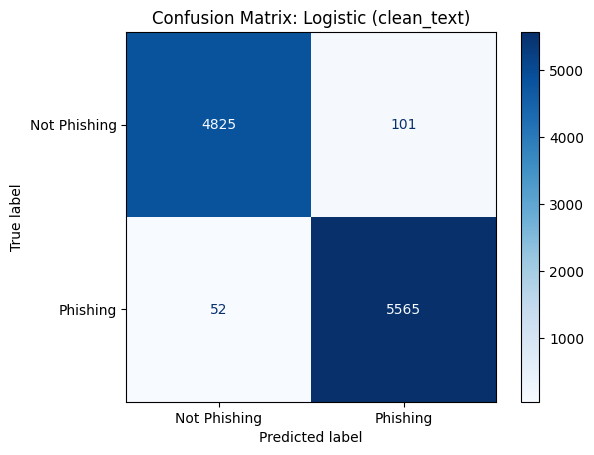


=== Logistic Regression (lowercase_only) ===
Accuracy: 0.9854880015175946

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      4926
           1       0.98      0.99      0.99      5617

    accuracy                           0.99     10543
   macro avg       0.99      0.99      0.99     10543
weighted avg       0.99      0.99      0.99     10543



<Figure size 600x500 with 0 Axes>

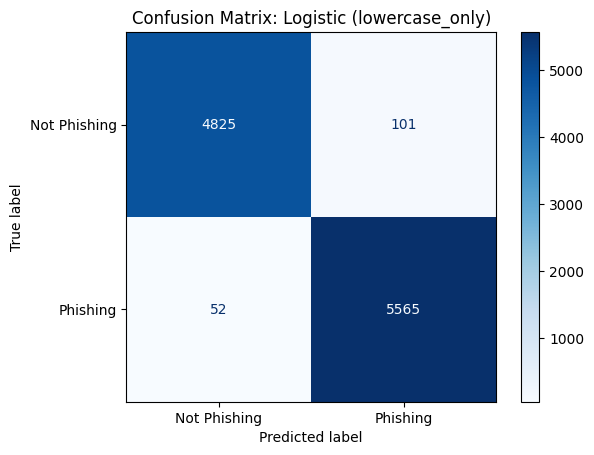


=== Logistic Regression (html_only) ===
Accuracy: 0.984729204211325

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      4926
           1       0.98      0.99      0.99      5617

    accuracy                           0.98     10543
   macro avg       0.99      0.98      0.98     10543
weighted avg       0.98      0.98      0.98     10543



<Figure size 600x500 with 0 Axes>

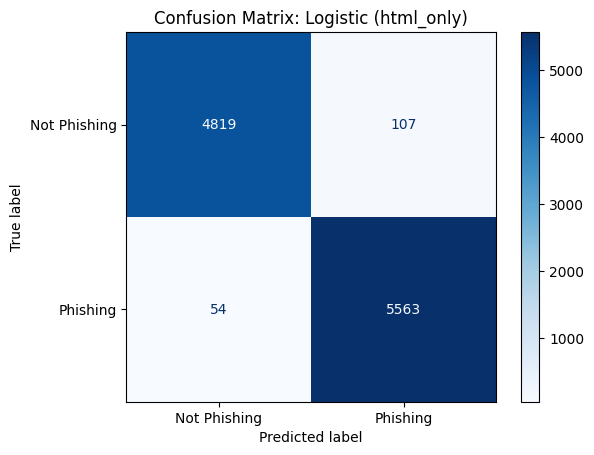


=== Logistic Regression (punct_only) ===
Accuracy: 0.9857725505074457

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      4926
           1       0.98      0.99      0.99      5617

    accuracy                           0.99     10543
   macro avg       0.99      0.99      0.99     10543
weighted avg       0.99      0.99      0.99     10543



<Figure size 600x500 with 0 Axes>

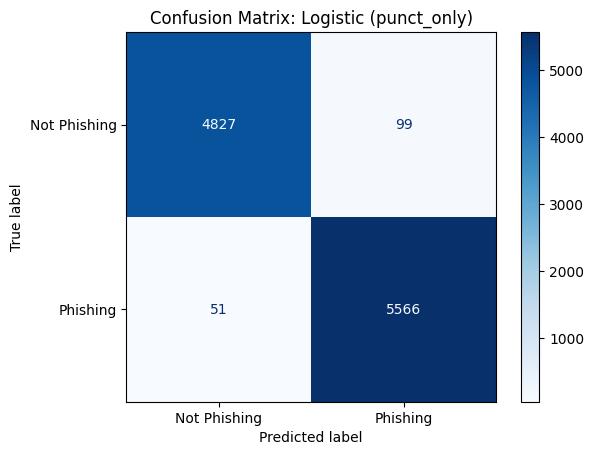


=== Logistic Regression (stopwords_only) ===
Accuracy: 0.984729204211325

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      4926
           1       0.98      0.99      0.99      5617

    accuracy                           0.98     10543
   macro avg       0.98      0.98      0.98     10543
weighted avg       0.98      0.98      0.98     10543



<Figure size 600x500 with 0 Axes>

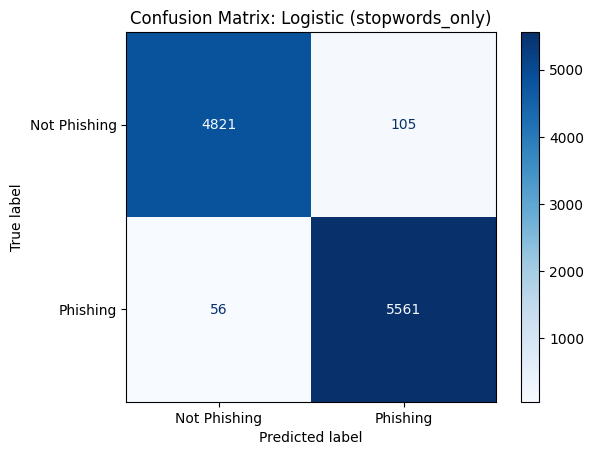


=== Logistic Regression (all_preprocessing) ===
Accuracy: 0.9854880015175946

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      4926
           1       0.98      0.99      0.99      5617

    accuracy                           0.99     10543
   macro avg       0.99      0.99      0.99     10543
weighted avg       0.99      0.99      0.99     10543



<Figure size 600x500 with 0 Axes>

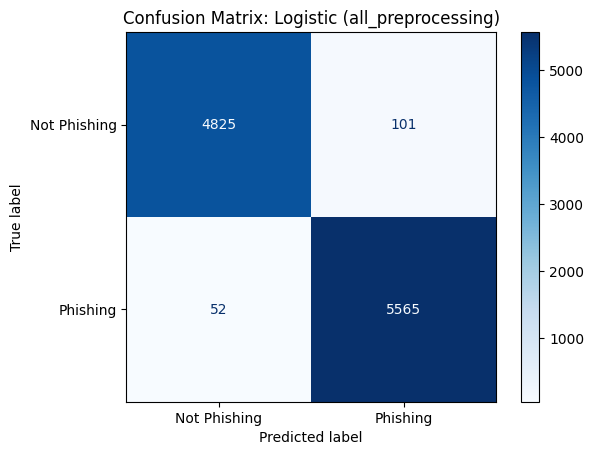

In [13]:
# Initialize results dictionary
results = {}

# Loop over different preprocessing pipelines
for name, func in pipeline_variants.items():
    
    # Apply preprocessing to clean_text
    processed_text = df["clean_text"].fillna("unknown").astype(str).apply(func)
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(processed_text, df["label"], test_size=0.2, random_state=42)
    
    # Build pipeline: TF-IDF + Logistic Regression
    pipe = Pipeline([
        ("tfidf", TfidfVectorizer(max_features=1000)),
        ("clf", LogisticRegression(max_iter=2000))
    ])
    
    # Train model
    pipe.fit(X_train, y_train)
    
    # Predict
    y_pred = pipe.predict(X_test)
    
    # Print evaluation
    acc = accuracy_score(y_test, y_pred)
    print(f"\n=== Logistic Regression ({name}) ===")
    print(f"Accuracy: {acc}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # Save results
    report = classification_report(y_test, y_pred, output_dict=True)
    results[name] = {
        "Accuracy": acc,
        "Precision": report["1"]["precision"],
        "Recall": report["1"]["recall"],
        "F1-Score": report["1"]["f1-score"]
    }
    
    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Phishing", "Phishing"])
    plt.figure(figsize=(6, 5))
    disp.plot(cmap=plt.cm.Blues, values_format="d")
    plt.title(f"Confusion Matrix: Logistic ({name})")
    plt.grid(False)
    plt.show()


## Logistic Regression (Full)


=== Logistic Regression Full (clean_text) ===
Accuracy: 0.9966802617850706

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      4926
           1       1.00      1.00      1.00      5617

    accuracy                           1.00     10543
   macro avg       1.00      1.00      1.00     10543
weighted avg       1.00      1.00      1.00     10543



<Figure size 600x500 with 0 Axes>

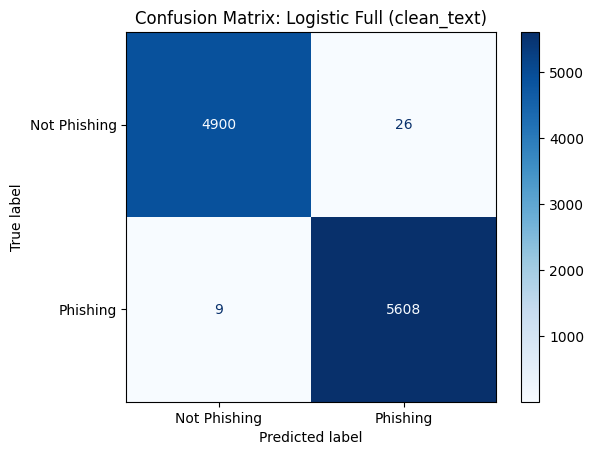


=== Logistic Regression Full (lowercase_only) ===
Accuracy: 0.9966802617850706

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      4926
           1       1.00      1.00      1.00      5617

    accuracy                           1.00     10543
   macro avg       1.00      1.00      1.00     10543
weighted avg       1.00      1.00      1.00     10543



<Figure size 600x500 with 0 Axes>

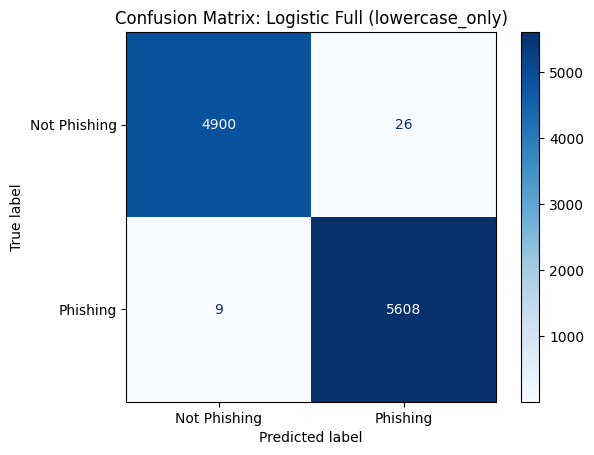


=== Logistic Regression Full (html_only) ===
Accuracy: 0.9967751114483544

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      4926
           1       1.00      1.00      1.00      5617

    accuracy                           1.00     10543
   macro avg       1.00      1.00      1.00     10543
weighted avg       1.00      1.00      1.00     10543



<Figure size 600x500 with 0 Axes>

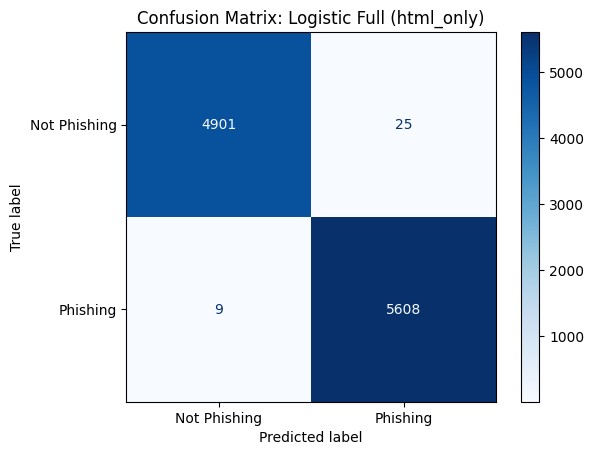


=== Logistic Regression Full (punct_only) ===
Accuracy: 0.996585412121787

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      4926
           1       1.00      1.00      1.00      5617

    accuracy                           1.00     10543
   macro avg       1.00      1.00      1.00     10543
weighted avg       1.00      1.00      1.00     10543



<Figure size 600x500 with 0 Axes>

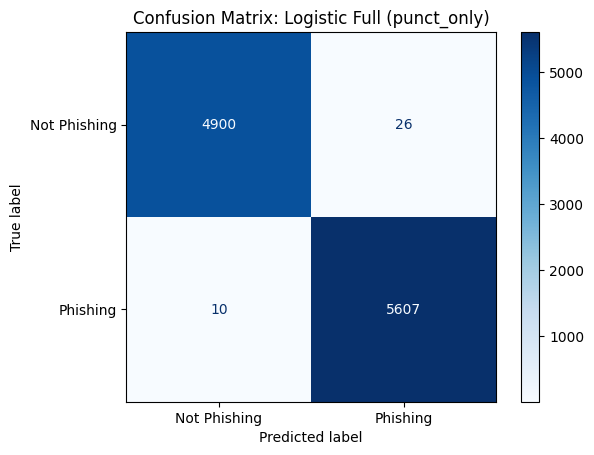


=== Logistic Regression Full (stopwords_only) ===
Accuracy: 0.9960163141420848

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      4926
           1       0.99      1.00      1.00      5617

    accuracy                           1.00     10543
   macro avg       1.00      1.00      1.00     10543
weighted avg       1.00      1.00      1.00     10543



<Figure size 600x500 with 0 Axes>

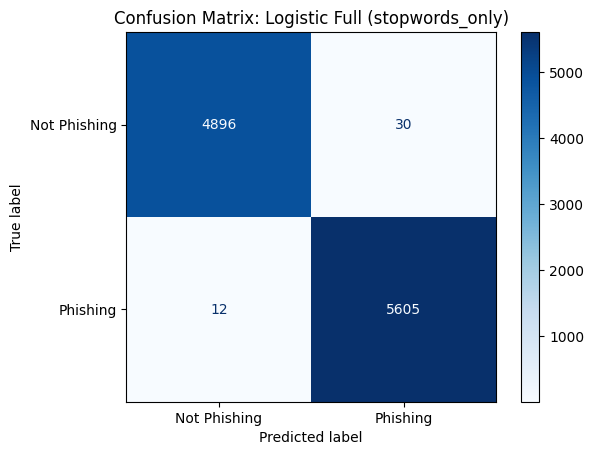


=== Logistic Regression Full (all_preprocessing) ===
Accuracy: 0.9967751114483544

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4926
           1       1.00      1.00      1.00      5617

    accuracy                           1.00     10543
   macro avg       1.00      1.00      1.00     10543
weighted avg       1.00      1.00      1.00     10543



<Figure size 600x500 with 0 Axes>

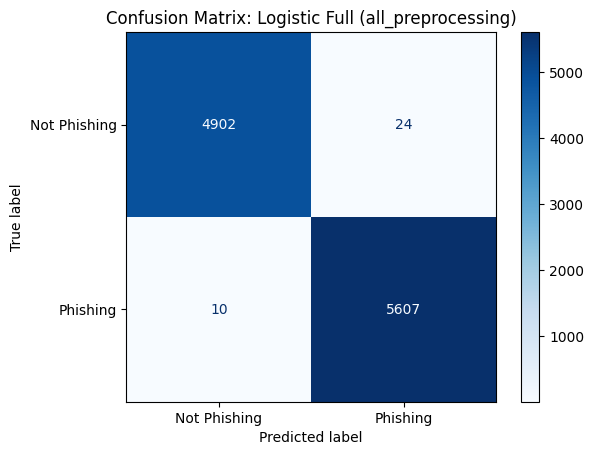

In [14]:
# Prepare metadata columns
for col in ["clean_text", "sender", "receiver"]:
    df[col] = df[col].fillna("unknown").replace("", "unknown").astype(str)

# Define label
y_full = df["label"]

# Initialize results dictionary
results_full = {}

# Loop over different preprocessing pipelines
for name, func in pipeline_variants.items():
    
    # Apply preprocessing to clean_text
    processed_text = df["clean_text"].astype(str).apply(func)
    
    # Create input X: processed clean_text + metadata
    X_full = df.copy()
    X_full["clean_text"] = processed_text
    X_full = X_full[["clean_text", "sender", "receiver", "urls"]]
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X_full, y_full, test_size=0.2, random_state=42)
    
    # Build full preprocessor for text + sender + receiver
    preprocessor = ColumnTransformer(
        transformers=[
            ("text", TfidfVectorizer(max_features=1000), "clean_text"),
            ("sender", TfidfVectorizer(max_features=100), "sender"),
            ("receiver", TfidfVectorizer(max_features=100), "receiver"),
        ],
        remainder="passthrough"  # Keep 'urls' column as numeric
    )
    
    # Build pipeline: preprocessing + logistic regression
    pipe = Pipeline([
        ("preprocessor", preprocessor),
        ("clf", LogisticRegression(max_iter=2000))
    ])
    
    # Train model
    pipe.fit(X_train, y_train)
    
    # Predict
    y_pred = pipe.predict(X_test)
    
    # Print evaluation
    acc = accuracy_score(y_test, y_pred)
    print(f"\n=== Logistic Regression Full ({name}) ===")
    print(f"Accuracy: {acc}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # Save results
    report = classification_report(y_test, y_pred, output_dict=True)
    results_full[name] = {
        "Accuracy": acc,
        "Precision": report["1"]["precision"],
        "Recall": report["1"]["recall"],
        "F1-Score": report["1"]["f1-score"]
    }
    
    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Phishing", "Phishing"])
    plt.figure(figsize=(6, 5))
    disp.plot(cmap=plt.cm.Blues, values_format="d")
    plt.title(f"Confusion Matrix: Logistic Full ({name})")
    plt.grid(False)
    plt.show()


## Naive Bayes


=== Naive Bayes (clean_text) ===
Accuracy: 0.9539979133074078

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      4926
           1       0.95      0.97      0.96      5617

    accuracy                           0.95     10543
   macro avg       0.95      0.95      0.95     10543
weighted avg       0.95      0.95      0.95     10543



<Figure size 600x500 with 0 Axes>

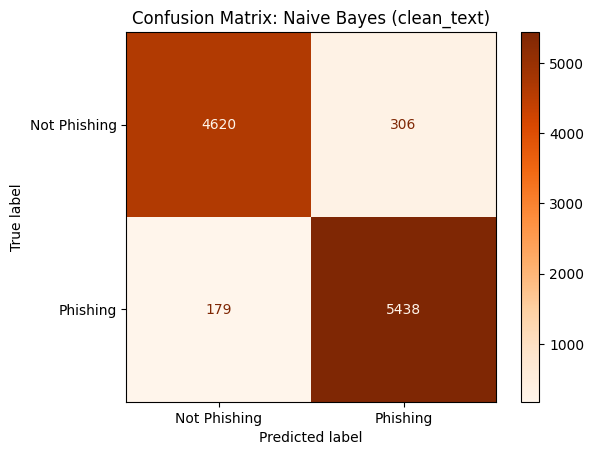


=== Naive Bayes (lowercase_only) ===
Accuracy: 0.9539979133074078

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      4926
           1       0.95      0.97      0.96      5617

    accuracy                           0.95     10543
   macro avg       0.95      0.95      0.95     10543
weighted avg       0.95      0.95      0.95     10543



<Figure size 600x500 with 0 Axes>

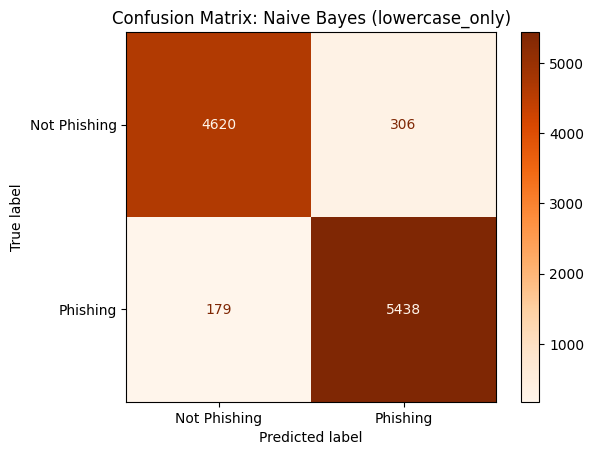


=== Naive Bayes (html_only) ===
Accuracy: 0.9552309589300958

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      4926
           1       0.95      0.97      0.96      5617

    accuracy                           0.96     10543
   macro avg       0.96      0.95      0.95     10543
weighted avg       0.96      0.96      0.96     10543



<Figure size 600x500 with 0 Axes>

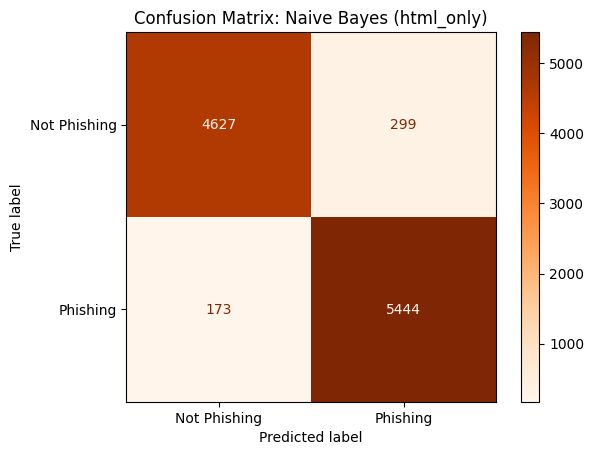


=== Naive Bayes (punct_only) ===
Accuracy: 0.95456701128711

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      4926
           1       0.95      0.97      0.96      5617

    accuracy                           0.95     10543
   macro avg       0.96      0.95      0.95     10543
weighted avg       0.95      0.95      0.95     10543



<Figure size 600x500 with 0 Axes>

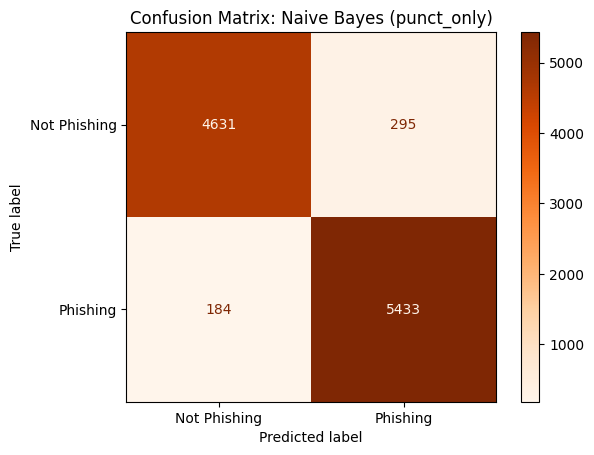


=== Naive Bayes (stopwords_only) ===
Accuracy: 0.9576022005121881

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.95      4926
           1       0.96      0.97      0.96      5617

    accuracy                           0.96     10543
   macro avg       0.96      0.96      0.96     10543
weighted avg       0.96      0.96      0.96     10543



<Figure size 600x500 with 0 Axes>

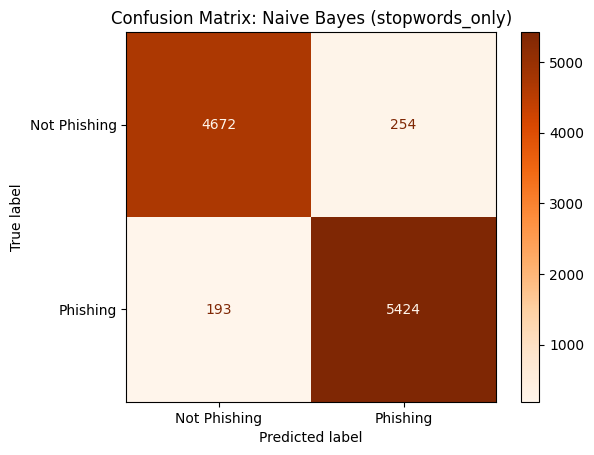


=== Naive Bayes (all_preprocessing) ===
Accuracy: 0.9552309589300958

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      4926
           1       0.95      0.97      0.96      5617

    accuracy                           0.96     10543
   macro avg       0.96      0.95      0.95     10543
weighted avg       0.96      0.96      0.96     10543



<Figure size 600x500 with 0 Axes>

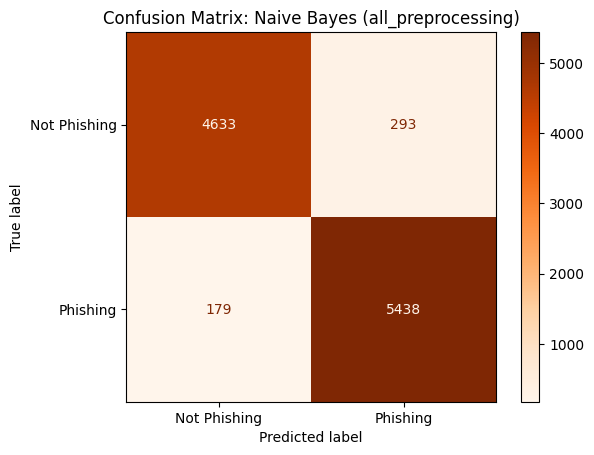

In [16]:
# Initialize results dictionary
results_nb = {}

# Loop over each preprocessing pipeline variant
for name, func in pipeline_variants.items():
    
    # Apply text preprocessing
    processed_text = df["clean_text"].fillna("unknown").astype(str).apply(func)
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(processed_text, df["label"], test_size=0.2, random_state=42)
    
    # Build Naive Bayes pipeline
    pipe = Pipeline([
        ("tfidf", TfidfVectorizer(max_features=1000)),
        ("clf", MultinomialNB())
    ])
    
    # Train
    pipe.fit(X_train, y_train)
    
    # Predict
    y_pred = pipe.predict(X_test)
    
    # Evaluate and print
    acc = accuracy_score(y_test, y_pred)
    print(f"\n=== Naive Bayes ({name}) ===")
    print(f"Accuracy: {acc}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # Save results
    report = classification_report(y_test, y_pred, output_dict=True)
    results_nb[name] = {
        "Accuracy": acc,
        "Precision": report["1"]["precision"],
        "Recall": report["1"]["recall"],
        "F1-Score": report["1"]["f1-score"]
    }
    
    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Phishing", "Phishing"])
    plt.figure(figsize=(6, 5))
    disp.plot(cmap=plt.cm.Oranges, values_format="d")
    plt.title(f"Confusion Matrix: Naive Bayes ({name})")
    plt.grid(False)
    plt.show()


## XGBoost


=== XGBoost (clean_text) ===
Accuracy: 0.9929811249170065

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4926
           1       0.99      1.00      0.99      5617

    accuracy                           0.99     10543
   macro avg       0.99      0.99      0.99     10543
weighted avg       0.99      0.99      0.99     10543



<Figure size 600x500 with 0 Axes>

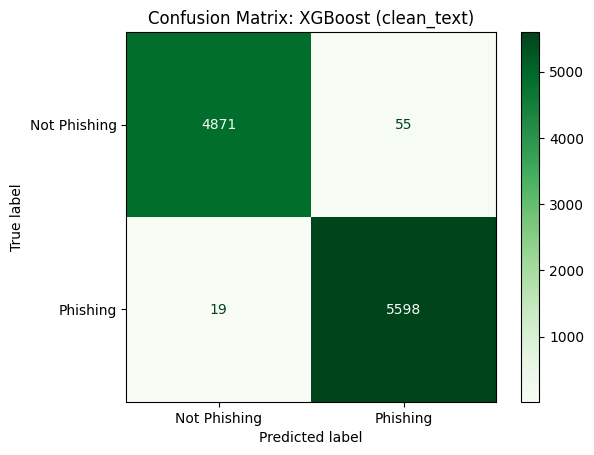


=== XGBoost (lowercase_only) ===
Accuracy: 0.9929811249170065

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4926
           1       0.99      1.00      0.99      5617

    accuracy                           0.99     10543
   macro avg       0.99      0.99      0.99     10543
weighted avg       0.99      0.99      0.99     10543



<Figure size 600x500 with 0 Axes>

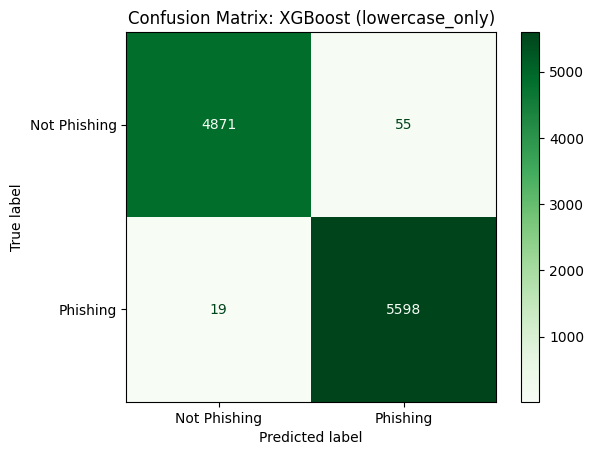


=== XGBoost (html_only) ===
Accuracy: 0.9928862752537229

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4926
           1       0.99      1.00      0.99      5617

    accuracy                           0.99     10543
   macro avg       0.99      0.99      0.99     10543
weighted avg       0.99      0.99      0.99     10543



<Figure size 600x500 with 0 Axes>

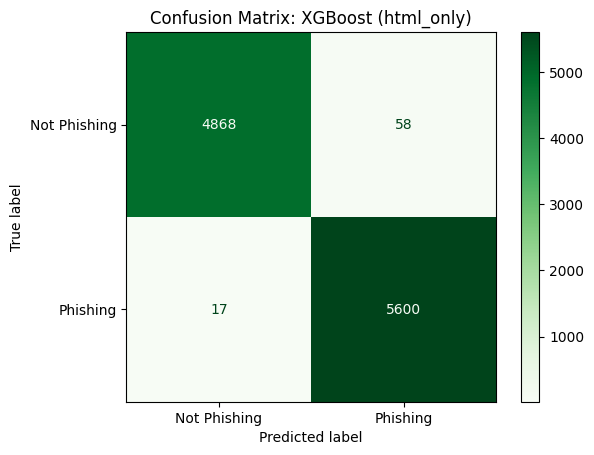


=== XGBoost (punct_only) ===
Accuracy: 0.9932656739068576

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4926
           1       0.99      1.00      0.99      5617

    accuracy                           0.99     10543
   macro avg       0.99      0.99      0.99     10543
weighted avg       0.99      0.99      0.99     10543



<Figure size 600x500 with 0 Axes>

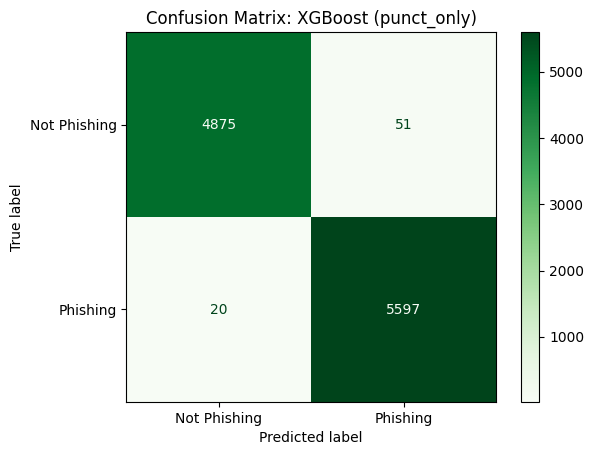


=== XGBoost (stopwords_only) ===
Accuracy: 0.992222327610737

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4926
           1       0.99      1.00      0.99      5617

    accuracy                           0.99     10543
   macro avg       0.99      0.99      0.99     10543
weighted avg       0.99      0.99      0.99     10543



<Figure size 600x500 with 0 Axes>

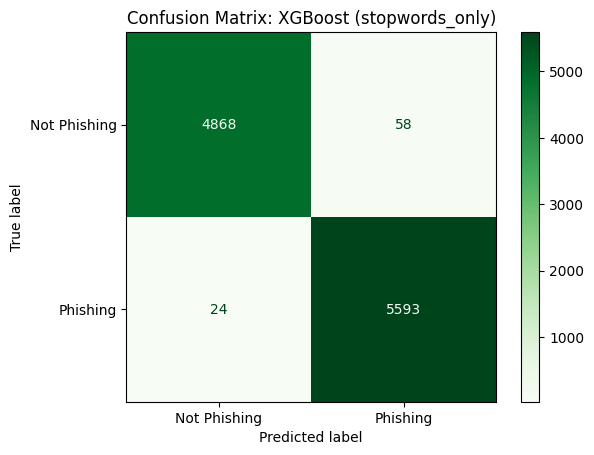


=== XGBoost (all_preprocessing) ===
Accuracy: 0.9935502228967087

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4926
           1       0.99      1.00      0.99      5617

    accuracy                           0.99     10543
   macro avg       0.99      0.99      0.99     10543
weighted avg       0.99      0.99      0.99     10543



<Figure size 600x500 with 0 Axes>

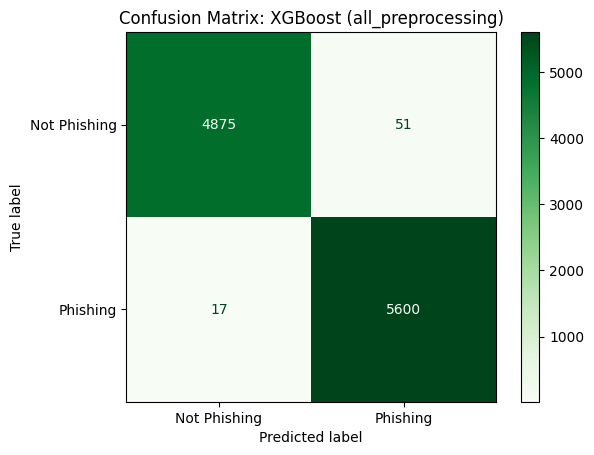

In [20]:
# Initialize results dictionary
results_xgb = {}

# Loop over each preprocessing pipeline variant
for name, func in pipeline_variants.items():
    
    # Apply text preprocessing
    processed_text = df["clean_text"].fillna("unknown").astype(str).apply(func)
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(processed_text, df["label"], test_size=0.2, random_state=42)
    
    # Build XGBoost pipeline
    pipe = Pipeline([
        ("tfidf", TfidfVectorizer(max_features=1000)),
        ("clf", xgb.XGBClassifier(eval_metric="logloss"))
    ])
    
    # Train
    pipe.fit(X_train, y_train)
    
    # Predict
    y_pred = pipe.predict(X_test)
    
    # Evaluate and print
    acc = accuracy_score(y_test, y_pred)
    print(f"\n=== XGBoost ({name}) ===")
    print(f"Accuracy: {acc}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # Save results
    report = classification_report(y_test, y_pred, output_dict=True)
    results_xgb[name] = {
        "Accuracy": acc,
        "Precision": report["1"]["precision"],
        "Recall": report["1"]["recall"],
        "F1-Score": report["1"]["f1-score"]
    }
    
    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Phishing", "Phishing"])
    plt.figure(figsize=(6, 5))
    disp.plot(cmap=plt.cm.Greens, values_format="d")
    plt.title(f"Confusion Matrix: XGBoost ({name})")
    plt.grid(False)
    plt.show()


## XGBoost (Full)


=== XGBoost Full (clean_text) ===
Accuracy: 0.9975339087546239

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4926
           1       1.00      1.00      1.00      5617

    accuracy                           1.00     10543
   macro avg       1.00      1.00      1.00     10543
weighted avg       1.00      1.00      1.00     10543



<Figure size 600x500 with 0 Axes>

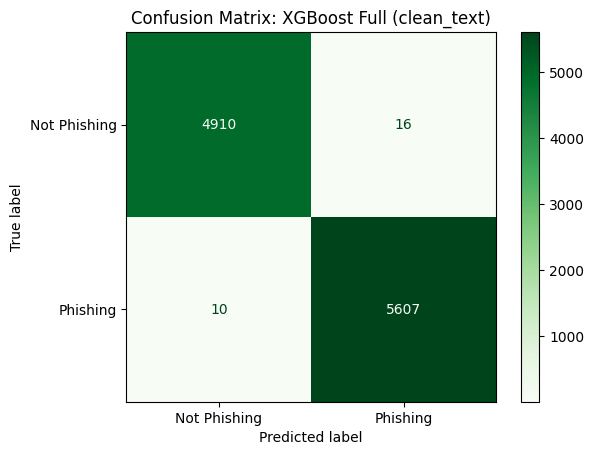


=== XGBoost Full (lowercase_only) ===
Accuracy: 0.9975339087546239

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4926
           1       1.00      1.00      1.00      5617

    accuracy                           1.00     10543
   macro avg       1.00      1.00      1.00     10543
weighted avg       1.00      1.00      1.00     10543



<Figure size 600x500 with 0 Axes>

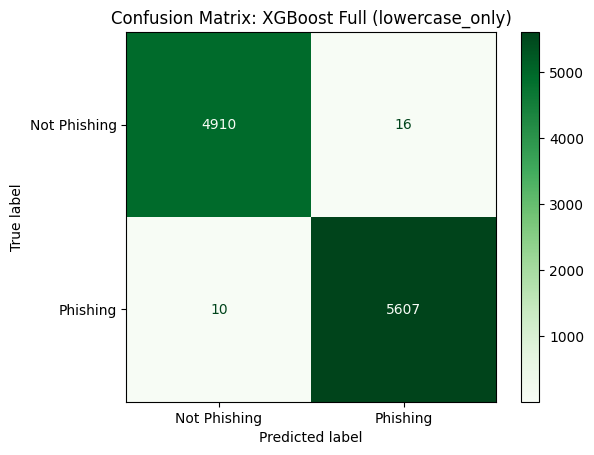


=== XGBoost Full (html_only) ===
Accuracy: 0.9977236080811913

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4926
           1       1.00      1.00      1.00      5617

    accuracy                           1.00     10543
   macro avg       1.00      1.00      1.00     10543
weighted avg       1.00      1.00      1.00     10543



<Figure size 600x500 with 0 Axes>

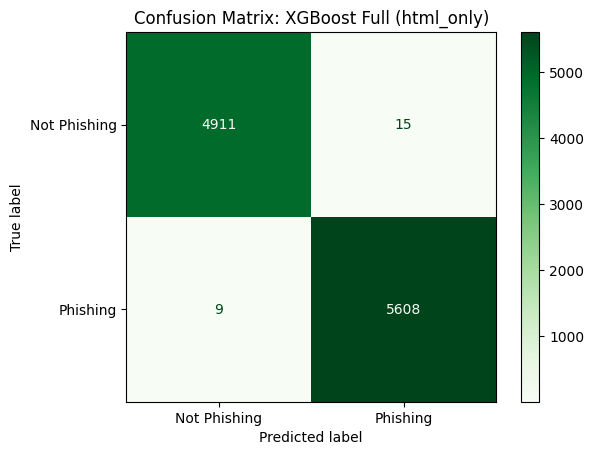


=== XGBoost Full (punct_only) ===
Accuracy: 0.9973442094280566

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4926
           1       1.00      1.00      1.00      5617

    accuracy                           1.00     10543
   macro avg       1.00      1.00      1.00     10543
weighted avg       1.00      1.00      1.00     10543



<Figure size 600x500 with 0 Axes>

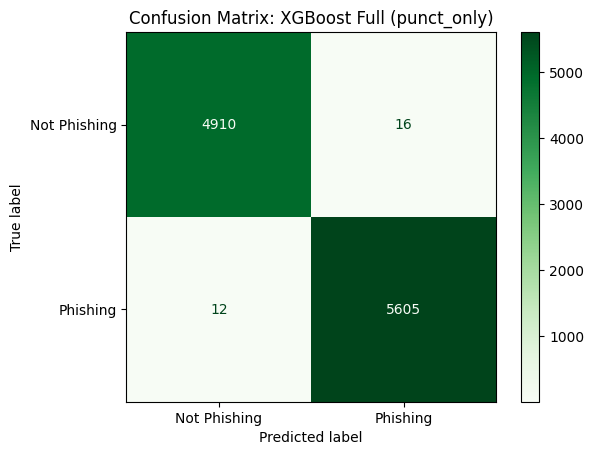


=== XGBoost Full (stopwords_only) ===
Accuracy: 0.9976287584179077

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4926
           1       1.00      1.00      1.00      5617

    accuracy                           1.00     10543
   macro avg       1.00      1.00      1.00     10543
weighted avg       1.00      1.00      1.00     10543



<Figure size 600x500 with 0 Axes>

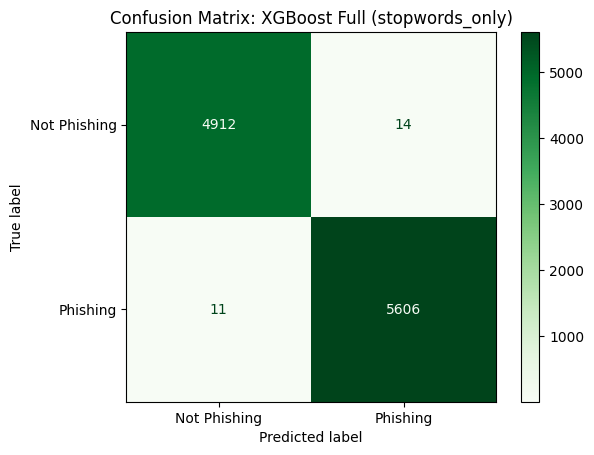


=== XGBoost Full (all_preprocessing) ===
Accuracy: 0.997818457744475

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4926
           1       1.00      1.00      1.00      5617

    accuracy                           1.00     10543
   macro avg       1.00      1.00      1.00     10543
weighted avg       1.00      1.00      1.00     10543



<Figure size 600x500 with 0 Axes>

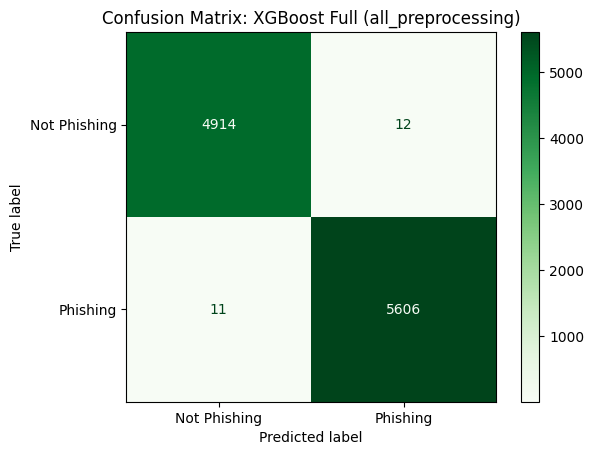

In [19]:
# Make sure metadata columns are clean
for col in ["clean_text", "sender", "receiver"]:
    df[col] = df[col].fillna("unknown").astype(str)

# Define label
y_xgb_full = df["label"]

# Initialize results dictionary
results_xgb_full = {}

# Loop through each preprocessing variant
for name, func in pipeline_variants.items():
    
    # Apply text preprocessing to clean_text only
    processed_text = df["clean_text"].apply(func)
    
    # Prepare new X with processed clean_text + sender, receiver, urls
    X_full = df.copy()
    X_full["clean_text"] = processed_text
    X_full = X_full[["clean_text", "sender", "receiver", "urls"]]

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X_full, y_xgb_full, test_size=0.2, random_state=42
    )

    # TF-IDF vectorize text columns separately
    tfidf_text = TfidfVectorizer(max_features=1000)
    tfidf_sender = TfidfVectorizer(max_features=100)
    tfidf_receiver = TfidfVectorizer(max_features=100)

    X_train_text = tfidf_text.fit_transform(X_train["clean_text"])
    X_test_text = tfidf_text.transform(X_test["clean_text"])

    X_train_sender = tfidf_sender.fit_transform(X_train["sender"])
    X_test_sender = tfidf_sender.transform(X_test["sender"])

    X_train_receiver = tfidf_receiver.fit_transform(X_train["receiver"])
    X_test_receiver = tfidf_receiver.transform(X_test["receiver"])

    # urls is already numeric
    X_train_urls = X_train["urls"].values.reshape(-1, 1)
    X_test_urls = X_test["urls"].values.reshape(-1, 1)

    # Combine all features (text + metadata)
    X_train_combined = hstack([X_train_text, X_train_sender, X_train_receiver, X_train_urls])
    X_test_combined = hstack([X_test_text, X_test_sender, X_test_receiver, X_test_urls])

    # Train
    xgb_model = xgb.XGBClassifier(eval_metric="logloss")
    xgb_model.fit(X_train_combined, y_train)

    # Predict
    y_pred = xgb_model.predict(X_test_combined)

    # Evaluate and print
    acc = accuracy_score(y_test, y_pred)
    print(f"\n=== XGBoost Full ({name}) ===")
    print(f"Accuracy: {acc}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Save results
    report = classification_report(y_test, y_pred, output_dict=True)
    results_xgb_full[name] = {
        "Accuracy": acc,
        "Precision": report["1"]["precision"],
        "Recall": report["1"]["recall"],
        "F1-Score": report["1"]["f1-score"]
    }

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Phishing", "Phishing"])
    plt.figure(figsize=(6, 5))
    disp.plot(cmap=plt.cm.Greens, values_format="d")
    plt.title(f"Confusion Matrix: XGBoost Full ({name})")
    plt.grid(False)
    plt.show()
